In [33]:
#1. Wczytać do ramki dane z pliku movie.csv.
import pandas as pd
import numpy as np
movie: pd.DataFrame = pd.read_csv('C://Users//Bajdz//Documents//WiED//movie.csv')  # wczytanie ramki z pliku csv

movie.head()  # to tylko testowy podglad czy wczytalo sie poprawnie

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


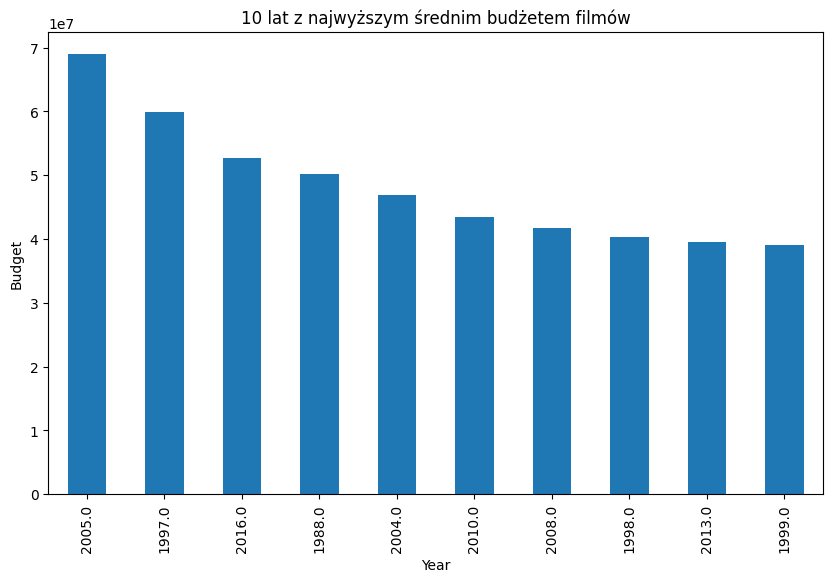

In [34]:
#2. Przygotować wykres słupkowy, w którym na osi x znajdzie się 10 lat, w których wystąpił najwyższy średni budżet filmów. Nadać tytuł osi y: "budget".

import pandas as pd
import matplotlib.pyplot as plt

# Przeliczanie średniego budżetu dla każdego roku
average_budget_by_year = movie.groupby('title_year')['budget'].mean().sort_values(ascending=False).head(10)

# Tworzenie wykresu słupkowego
plt.figure(figsize=(10, 6))
average_budget_by_year.plot(kind='bar')
plt.title('10 lat z najwyższym średnim budżetem filmów')
plt.ylabel('Budget')
plt.xlabel('Year')
plt.show()

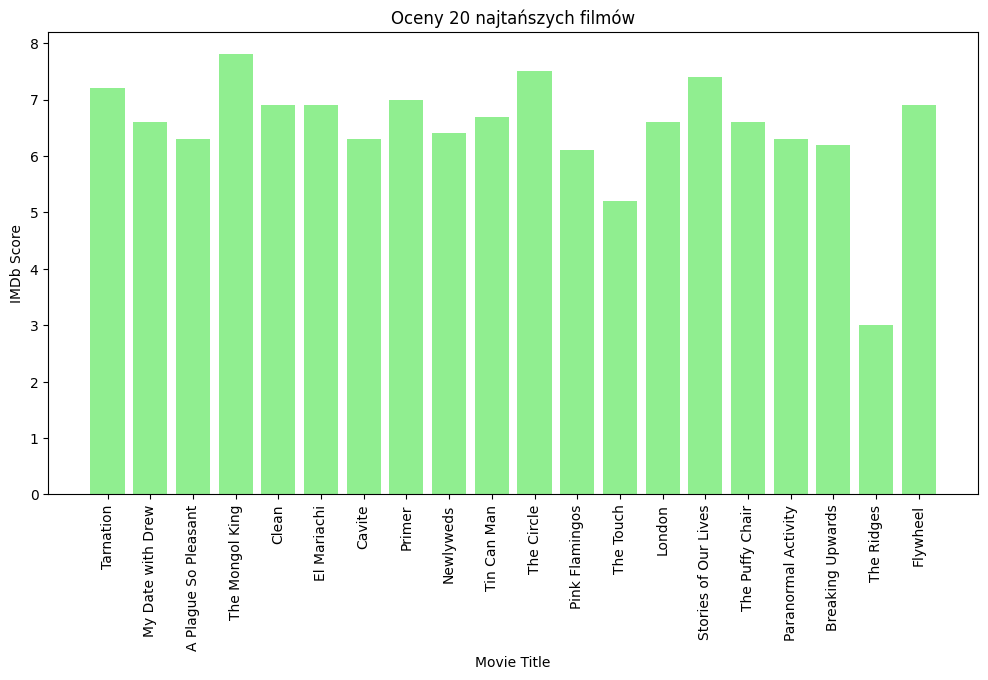

In [35]:
# 3. Przygotować wykres słupkowy przedstawiający oceny 20 najtańszych filmów. Na osi x umieścić tytuły filmów, a na osi y umieścić średnią ocenę.
# Sortowanie danych według kolumny 'budget' i wzięcie pierwszych 20 rekordów
cheapest_movies = movie.sort_values('budget').head(20)

# Tworzenie wykresu słupkowego
plt.figure(figsize=(12, 6))
plt.bar(cheapest_movies['movie_title'], cheapest_movies['imdb_score'],color = 'lightgreen')
plt.title('Oceny 20 najtańszych filmów')
plt.ylabel('IMDb Score')
plt.xlabel('Movie Title')
plt.xticks(rotation=90)  # Obrót etykiet dla lepszej czytelności
plt.show()

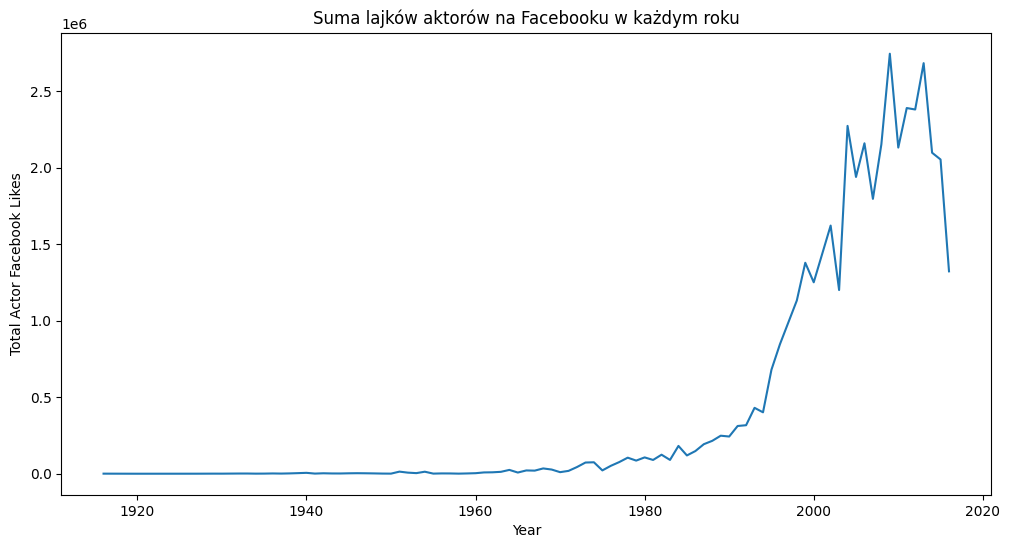

In [36]:
# 4. Przygotować wykres liniowy przedstawiający sumę wartości w kolumnach: actor_1_facebook_likes, actor_2_facebook_likes, actor_3_facebook_likes w każdym roku.
# Sumowanie lajków aktorów
movie['total_actor_facebook_likes'] = movie['actor_1_facebook_likes'] + movie['actor_2_facebook_likes'] + movie['actor_3_facebook_likes']

# Sumowanie lajków po roku
likes_by_year = movie.groupby('title_year')['total_actor_facebook_likes'].sum()

# Tworzenie wykresu liniowego
plt.figure(figsize=(12, 6))
likes_by_year.plot()
plt.title('Suma lajków aktorów na Facebooku w każdym roku')
plt.ylabel('Total Actor Facebook Likes')
plt.xlabel('Year')
plt.show()

<Figure size 1200x600 with 0 Axes>

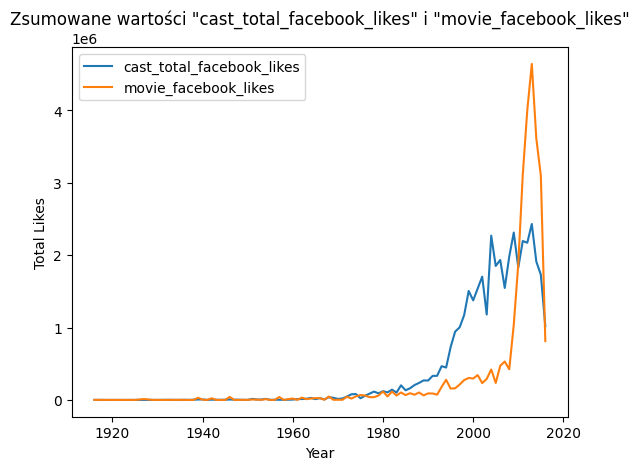

In [37]:
# 5. Przygotować wykres liniowy przedstawiający zsumowane wartości w każdym roku dla kolumn: cast_total_facebook_likes oraz movie_facebook_likes dla wszystkich filmów, których budżet mieści się w przedziale [m-s, m+s], gdzie m oznacza średni budżet, a s oznacza odchylenie standardowe budżetu.

# Obliczanie średniego budżetu i odchylenia standardowego budżetu
mean_budget = movie['budget'].mean()
std_budget = movie['budget'].std()

# Filtracja filmów z budżetem w przedziale [m-s, m+s]
budget_filtered_movie = movie[(movie['budget'] >= mean_budget - std_budget) & (movie['budget'] <= mean_budget + std_budget)]

# Sumowanie wartości z podanych kolumn po roku
likes_by_year = budget_filtered_movie.groupby('title_year')[['cast_total_facebook_likes', 'movie_facebook_likes']].sum()

# Tworzenie wykresu
plt.figure(figsize=(12, 6))
likes_by_year.plot()
plt.title('Zsumowane wartości "cast_total_facebook_likes" i "movie_facebook_likes"')
plt.ylabel('Total Likes')
plt.xlabel('Year')
plt.show()


<module 'matplotlib.pyplot' from 'c:\\Users\\Bajdz\\anaconda3\\envs\\py3117\\Lib\\site-packages\\matplotlib\\pyplot.py'>

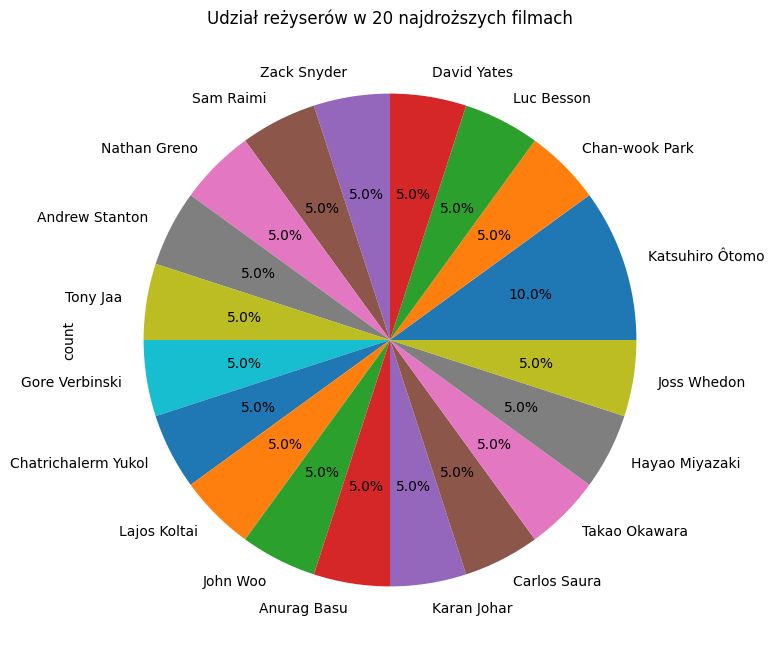

In [38]:
# 6. Przygotować wykres kołowy przedstawiający udział każdego reżysera w 20 najdroższych filmach.
# 20 najdroższych filmów
most_expensive_movies = movie.sort_values('budget', ascending=False).head(20)

# Zliczanie ilości filmów dla każdego reżysera
directors_count = most_expensive_movies['director_name'].value_counts()

# Tworzenie wykresu kołowego
plt.figure(figsize=(8, 8))
directors_count.plot(kind='pie', autopct='%1.1f%%')  # `%1.1f%%`  - procenty
plt.title('Udział reżyserów w 20 najdroższych filmach')
plt